## Interpolacja
##### Anna Zając

**Zadanie 1**<br />
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [1]:
function LagrangeInterpolation(xvalues,yvalues)
    function LagrangeInterpolationFor(x)
    N = length(xvalues)
        LagrangePolynomial = ones(N)
        for i in 1:N
            for j in [1:i-1;i+1:N]
                LagrangePolynomial[i]=LagrangePolynomial[i].*(x-xvalues[j][1])./(xvalues[i][1]-xvalues[j][1])
                
            end
        end
        return sum(LagrangePolynomial.*yvalues)
        end 
    return LagrangeInterpolationFor
end

LagrangeInterpolation (generic function with 1 method)

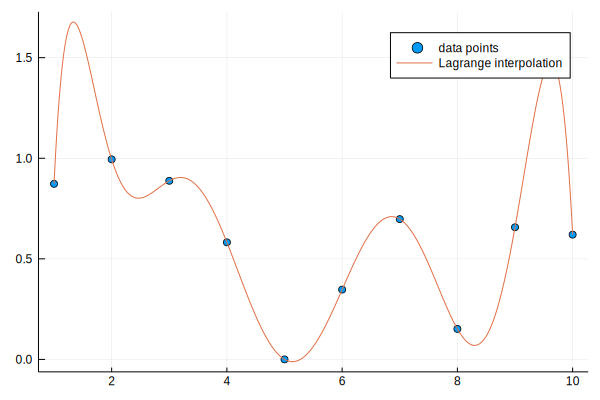

In [64]:
using Plots
xs_one =  1:1:10
ys_one = [rand() for x in xs_one]
xsf_one =1:0.01:10
lagrange = LagrangeInterpolation(xs_one,ys_one)
ysf_one =[lagrange(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="Lagrange interpolation")

**Zadanie 2** <br />
Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ :<br />

A.napisać funkcję NewtonInterpolation, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" newt<br />
B.napisać funkcję która wylicza wartość wielomianu dla obiektu newt w punkcie x.
<br />
<br />
Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

In [37]:
function NewtonInterpolation(xvalues,yvalues)
    function newt(x)
        N = length(xvalues)
        q = zeros(Float64,N,N)
        q[:,1] = yvalues
        output = q[1,1]
        f = 1
        for i in 2:N
            for j in i:N
                q[j,i] = (q[j,i-1] - q[j-1,i-1]) / (xvalues[j] - xvalues[j-i+1])
            end
            f = f * (x-xvalues[i-1])
            output = output + q[i,i]*f
        end
        return output
    end
    return newt
end

NewtonInterpolation (generic function with 1 method)

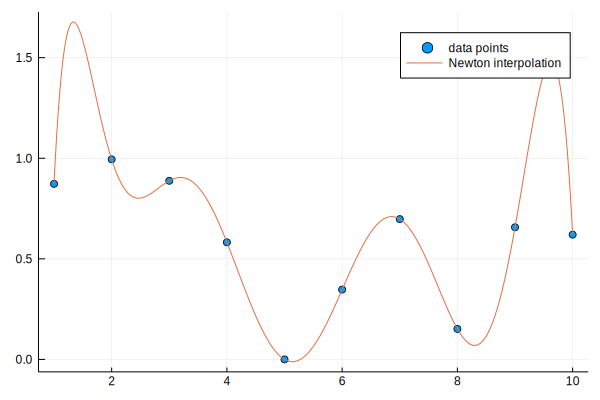

In [70]:
newton = NewtonInterpolation(xs_one,ys_one)
ysf_one = [newton(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="Newton interpolation")

**Zadanie 3** <br />
Zastosowac interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

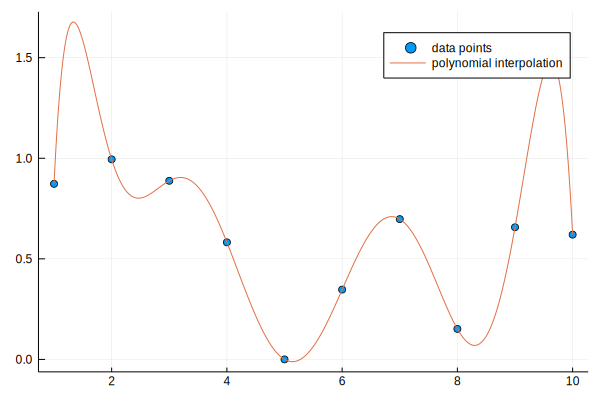

In [71]:
using Polynomials
polynomial = polyfit(xs_one,ys_one)
ysf = [polynomial(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="polynomial interpolation")

Można zauważyć, że uzyskane za pomocą wszytskich trzech metod (interpolacji Lagrange'a, metody ilorazów różnicowych oraz interpolacji wielomianowej pakietu Polynomials) wykresy wielomianów są identyczne. Powodem tego jest fakt, że istnieje tylko jeden wielomian stopnia $\le n$ przechodzący przez punkty:
$${(x_i,f_i), i = 0,1,2,...,n, x_i\ne x_j }$$
co zostało zresztą udowodnione na wykładzie.

**Zadanie 4**<br/>
Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.

In [6]:
function random(xs)
    return [rand() for x in xs]
end

random (generic function with 1 method)

In [21]:
using DataFrames
times = DataFrame(number = Int64[], time = Float64[], type = String[])
xs = [1:1:1000,1:1:5000,1:1:10000,1:1:50000,1:1:75000,1:1:100000,1:1:150000,1:1:300000,1:1:500000,1:1:1000000]
xsp = [1:1:100,1:1:400,1:1:600,1:1:800,1:1:1000,1:1:2000,1:1:4000,1:1:6000,1:1:8000,1:1:10000]        
ys = [random(x) for x in xs]
ysp = [random(x) for x in xsp]
xsf = [1:0.1:100,1:0.1:500,1:0.1:1000,1:0.1:5000,1:0.1:7500,1:0.1:10000,1:0.1:15000,1:0.1:30000,1:0.1:50000,1:0.1:100000] 
xsfp = [1:0.1:100,1:0.1:400,1:0.1:600,1:0.1:800,1:0.1:1000,1:0.1:2000,1:0.1:4000,1:0.1:6000,1:0.1:8000,1:0.1:10000]          
for i in 1:10
    for j in 1:10
    push!(times , [maximum(collect(xs[i])) , (@elapsed lagrange = LagrangeInterpolation(collect(xs[i]),ys[i])) , "Lagrange"])
    push!(times , [maximum(collect(xs[i])) , (@elapsed newton = NewtonInterpolation(collect(xs[i]),ys[i])) , "Newton"])
    push!(times , [maximum(collect(xsp[i])) , (@elapsed poly = polyfit(collect(xsp[i]),ysp[i])) , "polynomial"])
    push!(times , [maximum(collect(xs[i])) , (@elapsed (lagrange(x) for x in collect(xs[i]))) , "XLagrange"])
    push!(times , [maximum(collect(xs[i])) , (@elapsed (newton(x) for x in collect(xs[i]))) , "XNewton"])
    push!(times , [maximum(collect(xsp[i])) , (@elapsed (poly(x) for x in collect(xsp[i]))) , "Xpolynomial"])
    end
end
times        

,number,time,type
,Int64,Float64,String
1,1000,5.701e-6,Lagrange
2,1000,3.6e-6,Newton
3,100,0.103973,polynomial
4,1000,2.7e-6,XLagrange
5,1000,2.3e-6,XNewton
6,100,2.7e-6,Xpolynomial
7,1000,2.9e-6,Lagrange
8,1000,3.101e-6,Newton
9,100,0.0016847,polynomial


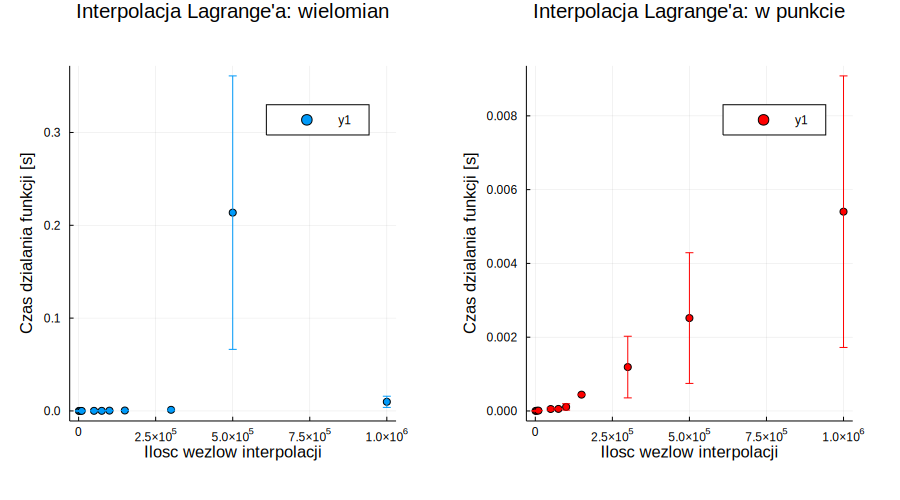

In [22]:
using Statistics
using Plots.PlotMeasures

tmp_lagrange = filter(row -> row.type == "Lagrange",times)
tmp_lagrange_x = filter(row -> row.type == "XLagrange",times)
                
meanLag = Float64[]
meanLagX = Float64[]
stdLag = Float64[]
stdLagX = Float64[]
xes = Int[]
                
for x in xs
    tmp = filter(row -> row.number == maximum(collect(x)), tmp_lagrange)
    tmp2 = filter(row -> row.number == maximum(collect(x)), tmp_lagrange_x)
    push!(xes,maximum(collect(x)))
    push!(meanLag,mean(tmp[:,2]))               
    push!(stdLag,std(tmp[:,2]))
    push!(meanLagX,mean(tmp2[:,2]))               
    push!(stdLagX,std(tmp2[:,2]))    
end
                
p1 = scatter(xes,meanLag,yerr=stdLag, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=5mm,title="Interpolacja Lagrange'a: wielomian")
p2 = scatter(xes,meanLagX,yerr=stdLagX,colour=:red, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=10mm,title="Interpolacja Lagrange'a: w punkcie")

plot(p1,p2,layout=2)
plot!(size=(900,500))
        

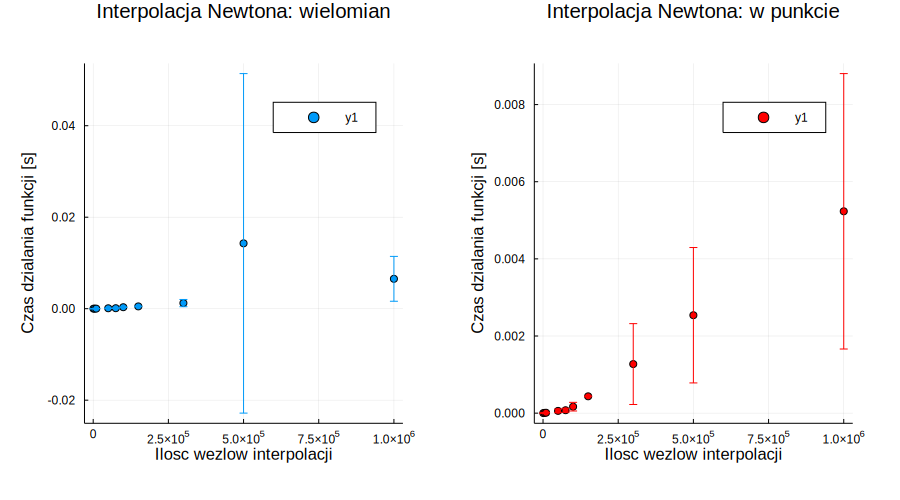

In [23]:
tmp_newton = filter(row -> row.type == "Newton",times)
tmp_newton_x = filter(row -> row.type == "XNewton",times)
                
meanN = Float64[]
meanNX = Float64[]
stdN = Float64[]
stdNX = Float64[]
xes = Int[]
                
for x in xs
    tmp = filter(row -> row.number == maximum(collect(x)), tmp_newton)
    tmp2 = filter(row -> row.number == maximum(collect(x)), tmp_newton_x)
    push!(xes,maximum(collect(x)))
    push!(meanN,mean(tmp[:,2]))               
    push!(stdN,std(tmp[:,2]))
    push!(meanNX,mean(tmp2[:,2]))               
    push!(stdNX,std(tmp2[:,2]))    
end
                
p1 = scatter(xes,meanN,yerr=stdN, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=5mm,title="Interpolacja Newtona: wielomian")
p2 = scatter(xes,meanNX,yerr=stdNX,colour=:red, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=10mm,title="Interpolacja Newtona: w punkcie")

plot(p1,p2,layout=2)
plot!(size=(900,500))

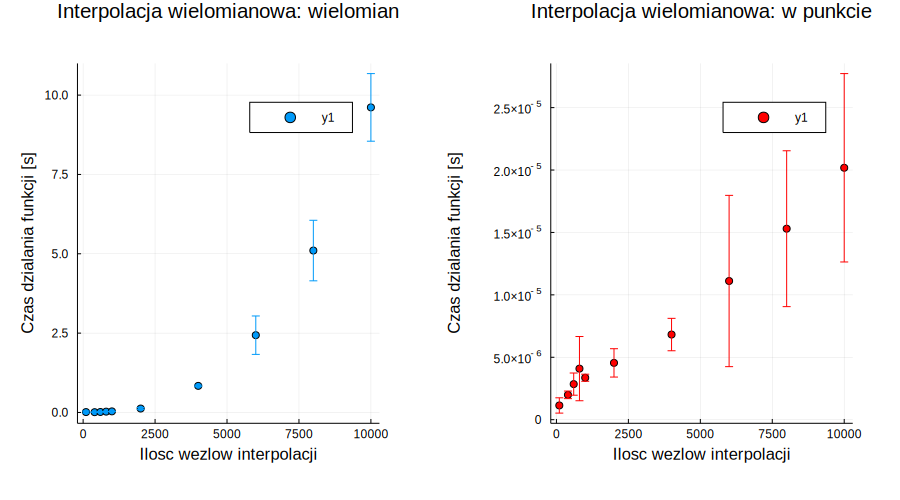

In [24]:
tmp_poly = filter(row -> row.type == "polynomial",times)
tmp_poly_x = filter(row -> row.type == "Xpolynomial",times)
                
meanP = Float64[]
meanPX = Float64[]
stdP = Float64[]
stdPX = Float64[]
xesp = Int[]
                
for x in xsp
    tmp = filter(row -> row.number == maximum(collect(x)), tmp_poly)
    tmp2 = filter(row -> row.number == maximum(collect(x)), tmp_poly_x)
    push!(xesp,maximum(collect(x)))
    push!(meanP,mean(tmp[:,2]))               
    push!(stdP,std(tmp[:,2]))
    push!(meanPX,mean(tmp2[:,2]))               
    push!(stdPX,std(tmp2[:,2]))    
end
                
p1 = scatter(xesp,meanP,yerr=stdP, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=5mm,title="Interpolacja wielomianowa: wielomian")
p2 = scatter(xesp,meanPX,yerr=stdPX,colour=:red, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=10mm,title="Interpolacja wielomianowa: w punkcie")

plot(p1,p2,layout=2)
plot!(size=(900,500))

Porównanie wykresów dla obliczania samych wielomianów dla poszczególnych sposobów interpolacji:

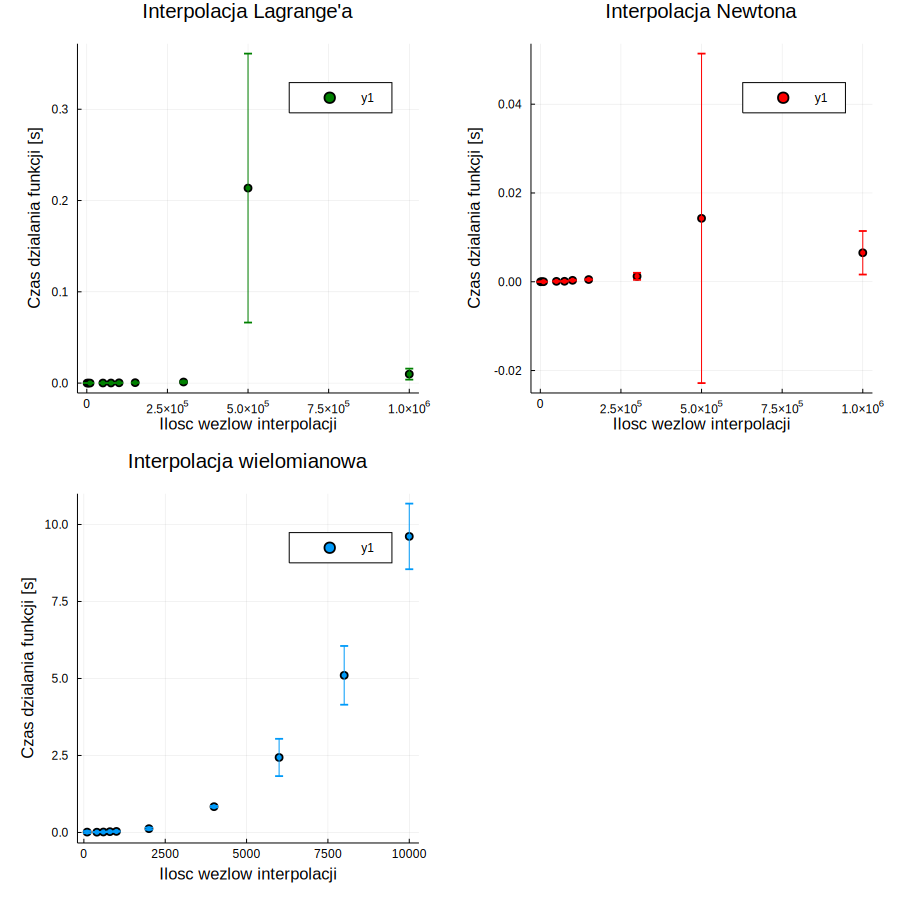

In [25]:
p3 = scatter(xesp,meanP,yerr=stdP, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=5mm,title="Interpolacja wielomianowa")
p2 = scatter(xes,meanN,yerr=stdN,colour=:red, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=5mm,title="Interpolacja Newtona")
p1 = scatter(xes,meanLag,yerr=stdLag,colour=:green, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=5mm,title="Interpolacja Lagrange'a")
plot(p1,p2,p3,layout=3)
plot!(size=(900,900))

Funkcje do interpolacji Lagrange'a i do interpolacji Newtona mają podobne czasy budowania wielomianu (z niewyjaśnioną anomalią dla 500 tys węzłów interpolacji), natomiast funkcja z biblioteki Polynomial potrzebuje znacznie więcej czasu na budowę wielomianu dla stukrotnie mniejszej ilości węzłów interpolacji.<br />
Warto również zauważyć, że czas dla interpolacji wielomianowej rośnie kwadratowo, natomiast dla interpolacji Newtona i Lagrange'a wzrost czasu wraz ze zwiększeniem ilości węzłów jest znikomy (pomijając anomalię dla 500 tys węzłów).

Porównanie wykresów dla obliczania wartości w punkcie dla poszczególnych wielomianów:

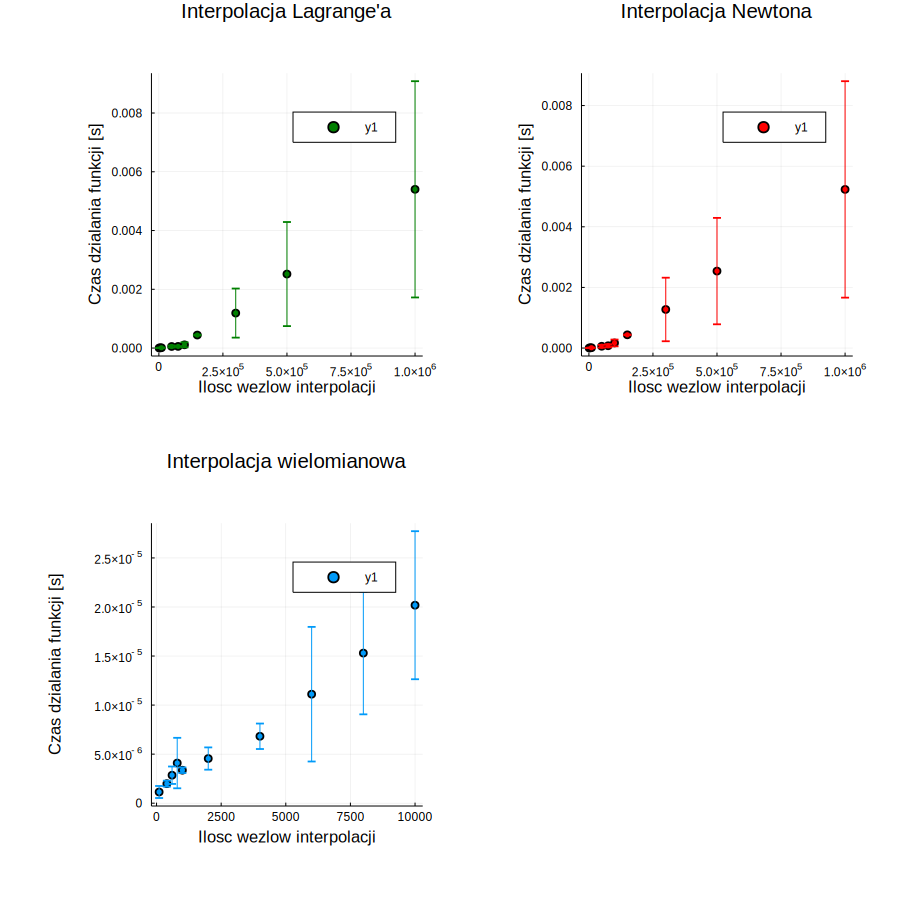

In [26]:
p3 = scatter(xesp,meanPX,yerr=stdPX, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=10mm,title="Interpolacja wielomianowa")
p2 = scatter(xes,meanNX,yerr=stdNX,colour=:red, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=10mm,title="Interpolacja Newtona")
p1 = scatter(xes,meanLagX,yerr=stdLagX,colour=:green, xlabel="Ilosc wezlow interpolacji",ylabel="Czas dzialania funkcji [s]",margin=10mm,title="Interpolacja Lagrange'a")
plot(p1,p2,p3,layout=3)
plot!(size=(900,900))

Przy obliczaniu wartości wielomianu w punkcie nie ma już tak ogromnych rozbieżności czasowych jak przy wyliczaniu samego wielomianu.<br /> 
Czasy dla interpolacji Lagrange'a i Newtona rosną wg funkcji kwadratowej, natomiast dla interpolacji z pakietu Polynomials wzrost ten jest liniowy (chociaż ilość węzłów interpolacji również jest mniejsza, więc trudno przewidzieć jak ta funkcja zachowywałaby się dla wyższych wartości).

**Zadanie 5**<br />
Poeksperymentować z interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane), narysować wykresy i porównać z wykresami interpolacji wielomianowej.

Dla porównania do funkcji sklejanych przypomnienie, jak wyglądał wykres wielomianu interpolacyjnego:

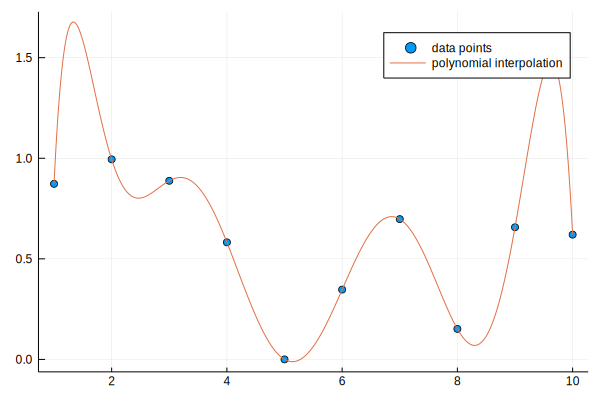

In [69]:
polynomial = polyfit(xs_one,ys_one)
ysf_one = [polynomial(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="polynomial interpolation")

**BSpline stopnia zerowego**

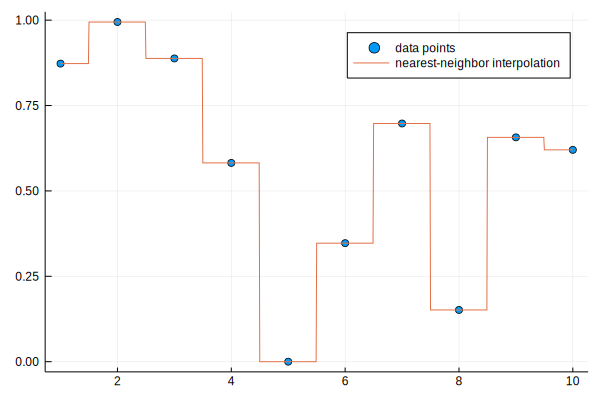

In [68]:
using Interpolations
itp = interpolate(ys_one, BSpline(Constant()))
ysf_one = [itp(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="nearest-neighbor interpolation")

Powstała funkcja jest zupełnie różna od interpolacji wielomianowej, ale nie widać efektu Rungego.

**BSpline stopnia pierwszego**

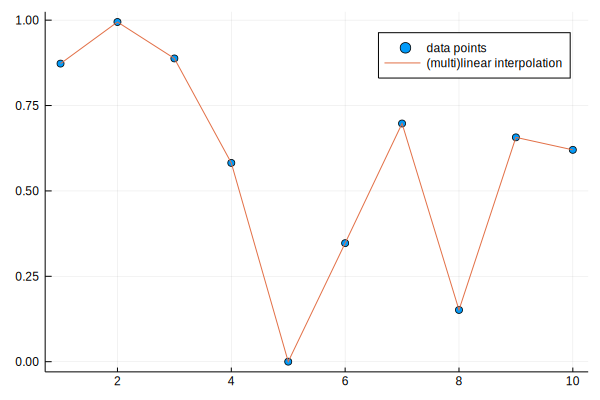

In [67]:
itp = interpolate(ys_one, BSpline(Linear()))
ysf_one = [itp(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="(multi)linear interpolation")

Uzyskana funkcja jest mniej "kwadratowa" niż ta uzyskana przy stopniu zerowym: teraz jest to po prostu interpolacja liniowa.

**BSpline stopnia drugiego**

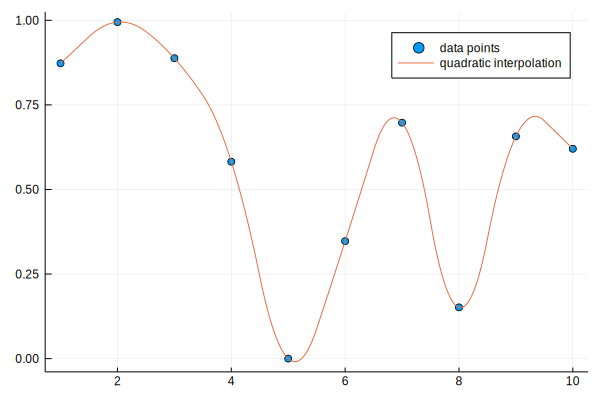

In [66]:
itp = interpolate(ys_one, BSpline(Quadratic(Line(OnCell()))))
ysf_one = [itp(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="quadratic interpolation")

Uzyskany wykres zbliża się wyglądem do wielomianu uzyskanego w pierwszej części notebooka, nie obserwuje się jednak efektu Rungego.

**BSpline rzędu trzeciego**

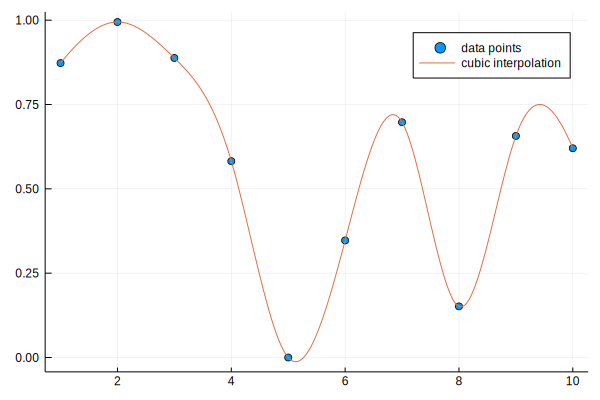

In [65]:
itp = interpolate(ys_one, BSpline(Cubic(Line(OnCell()))))
ysf_one = [itp(x) for x in xsf_one]
scatter(xs_one,ys_one, label="data points")
plot!(xsf_one,ysf_one, label="cubic interpolation")

Uzyskany wykres bardzo przypomina ten dla BSpline stopnia drugiego, łączy się jednak w ładniejszy sposób w niektórych miejscach (na przykład w punkcie przegięcia między 9 a 10 węzłem interpolacji), nadal również nie obserwuje się efektu Rungego.

**Zadanie 6**<br />
Zademonstrować efekt Rungego.

Efekt Rungego zosatnie zademostrowany na przykładzie funkcji Rungego:
$$f(x) = \frac{1}{1+25x^2}$$
na przedziale od -1 do 1 dla równoodległych punktów danych wzorem:
$$x_i = \frac{2i}{n}-1\ dla\ n=1,2,...,n$$

In [18]:
function Runge(x)
    return 1/(1+25*x^2)
end

Runge (generic function with 1 method)

In [19]:
function points(n)
    output = Float64[]
    for i in 0:n
        push!(output,(2*i/n - 1))
    end
    return output
end

points (generic function with 1 method)

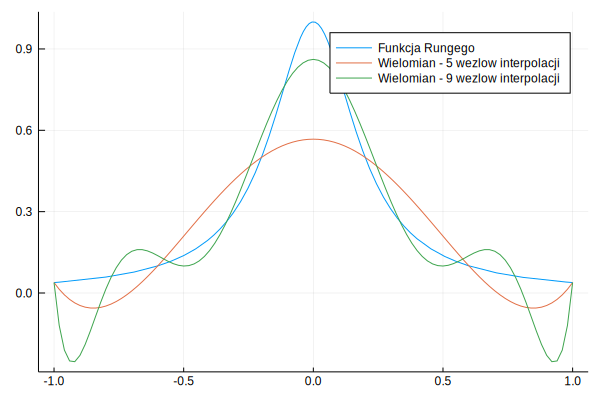

In [20]:
x_5 = points(5)
x_9 = points(9)
y_5 = [Runge(x) for x in x_5]
y_9 = [Runge(x) for x in x_9]

poly_5 = polyfit(x_5,y_5)
poly_9 = polyfit(x_9,y_9)

plot(Runge,-1,1,label="Funkcja Rungego")
plot!(poly_5,-1,1,label="Wielomian - 5 wezlow interpolacji")
plot!(poly_9,-1,1,label="Wielomian - 9 wezlow interpolacji")

Zgodnie z intuicją spodziewano się uzyskać lepszą dokładność dla większej ilości węzłów interpolacji, tak się jednak nie stało.
Jest to wynikiem efektu Rungego: jeśli węzły interpolacji są równoodległe oraz interpolacja jest wielomianowa, wraz ze wzrostem liczby węzłów pogarsza się dopasowanie wielomianu.<br />
Efekt Rungego można również zaobserwować na wykresach z pierwszej części zadania: w porównaniu do funkcji uzyskanych za pomocą interpolacji funkcjami sklejanymi, te uzyskane za pomocą interpolacji wielomianowej mają znacznie większe wartości maksimum na odcinkach między 1 a 2 oraz 9 a 10 węzłem interpolacji.